# First Question of 4th PS - Metrics III
## Marius 

In [319]:
from statsmodels.tsa.api import VAR
import statsmodels.api as sm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import random 

In [522]:
# Import Data
data_ff = pd.read_csv("C:\\Users\\mariu\\Downloads\\DFF.csv")
data_unrate = pd.read_csv("C:\\Users\\mariu\\Downloads\\UNRATE (3).csv")
data_infl = pd.read_csv("C:\\Users\\mariu\\Downloads\\GDP_deflator.csv")

In [523]:
# Merge'm
data = pd.merge(data_infl, data_unrate)
data = pd.merge(data, data_ff, on="DATE", how="inner")

In [524]:
data = data.rename({"A191RI1Q225SBEA":"infl", "DFF":"ff", "UNRATE":"un"}, axis=1)

In [525]:
data["infl"] = data["infl"] - data["infl"].mean()
data["ff"] = data["ff"] - data["ff"].mean()
data["un"] = data["un"] - data["un"].mean()

### Run Regressions with Lagsize 4

In [234]:
model = VAR(data[["infl", "un", "ff"]])
results = model.fit(4)
results.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 21, Feb, 2022
Time:                     13:35:39
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                  -0.770205
Nobs:                     256.000    HQIC:                  -1.09307
Log likelihood:          -883.028    FPE:                   0.269812
AIC:                     -1.31029    Det(Omega_mle):        0.232555
--------------------------------------------------------------------
Results for equation infl
             coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------
const          -0.009316         0.066965           -0.139           0.889
L1.infl         0.480887         0.063903            7.525           0.000
L1.un          -0.631603         0.221708           -2.849           0.004
L1.ff     

### Calculate IRF

In [235]:
irf = results.irf(20)
print(irf.irfs)

[[[ 1.00000000e+00  0.00000000e+00  0.00000000e+00]
  [ 0.00000000e+00  1.00000000e+00  0.00000000e+00]
  [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]

 [[ 4.80887260e-01 -6.31602611e-01  5.87367337e-02]
  [-2.00918469e-02  1.37099002e+00  3.34965438e-02]
  [ 1.49819087e-01 -1.61861161e+00  3.20995797e-01]]

 [[ 4.66689375e-01 -3.28930723e-01  3.02606989e-02]
  [-4.28140358e-02  1.64595307e+00  6.63123837e-02]
  [ 1.57558553e-01 -1.56700158e+00  1.65793087e-01]]

 [[ 4.19700201e-01 -6.37802631e-01  2.23247036e-02]
  [-4.43121764e-02  1.67324748e+00  9.74668541e-02]
  [ 3.02290745e-01 -1.76887008e+00  3.43678172e-01]]

 [[ 5.42916798e-01 -5.97047692e-01 -4.09870219e-02]
  [-2.31127965e-02  1.57649415e+00  9.11132848e-02]
  [ 2.91504717e-01 -1.86820366e+00  3.01955794e-01]]

 [[ 4.76423520e-01 -6.46417923e-01  7.90226296e-04]
  [-3.39378762e-03  1.43192948e+00  9.52036431e-02]
  [ 3.09577204e-01 -1.80008345e+00  2.07669323e-01]]

 [[ 4.69835676e-01 -6.06337016e-01 -1.50878318e-02]


### Plot IRF

In [578]:
irf = results.irf(20)


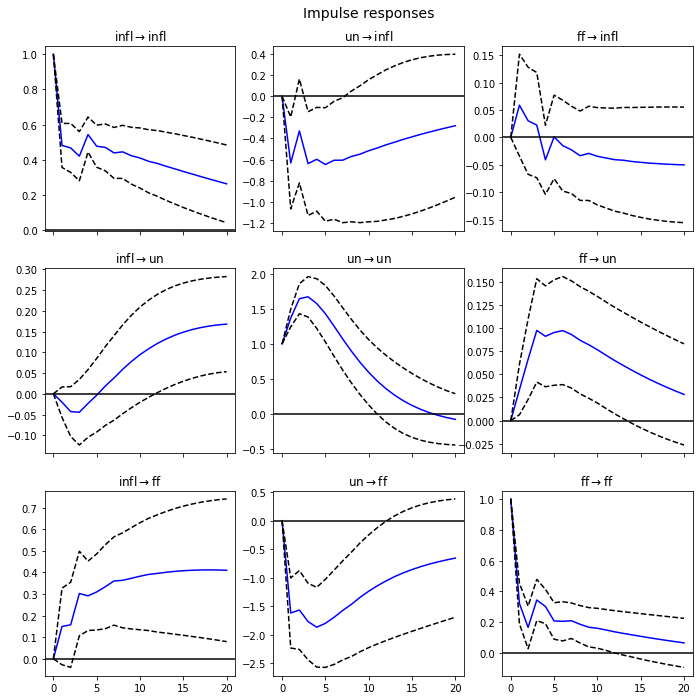

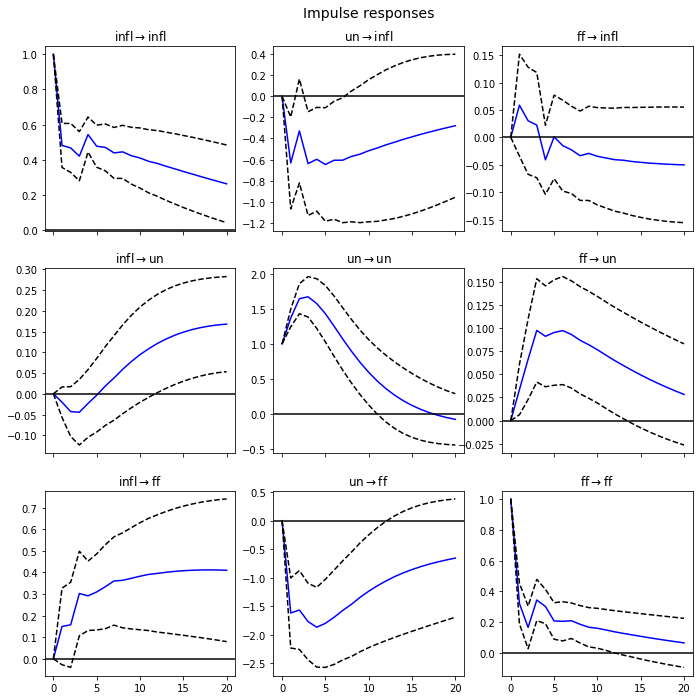

In [580]:
irf.plot(orth=False)

### Test for Granger Causality

In [585]:
granger_1 = results.test_causality('infl', ['un'], kind='f')
granger_2 = results.test_causality('infl', ['ff'], kind='f')
granger_3 = results.test_causality('un', ['infl'], kind='f')
granger_4 = results.test_causality('un', ['ff'], kind='f')
granger_5 = results.test_causality('ff', ['infl'], kind='f')
granger_6 = results.test_causality('ff', ['un'], kind='f')
granger_1.summary()

Test statistic,Critical value,p-value,df
2.504,2.384,0.041,"(4, 729)"


In [587]:
granger_2.summary()

Test statistic,Critical value,p-value,df
0.7296,2.384,0.572,"(4, 729)"


In [588]:
granger_3.summary()

Test statistic,Critical value,p-value,df
0.7182,2.384,0.580,"(4, 729)"


In [590]:
granger_4.summary()

Test statistic,Critical value,p-value,df
3.209,2.384,0.013,"(4, 729)"


In [589]:
granger_5.summary()

Test statistic,Critical value,p-value,df
5.062,2.384,0.000,"(4, 729)"


In [591]:
granger_6.summary()

Test statistic,Critical value,p-value,df
10.47,2.384,0.000,"(4, 729)"


To summarize the as received by the Granger Causality test.
We fail to reject that:
<ol>
    <li> Inflation does not granger-cause unemployment </li>
    <li> Fed Funds Rate does not granger-cause unemployment </li>
    <li> Fed Funds Rate does not granger-cause inflation </li>   
</ol>
For all other relationship, we can reject the $H_0$ that they do not granger-cause the y variable.

### Change of ordering

In [592]:
model = VAR(data[["ff", "un", "infl"]])
results_2 = model.fit(4)
results_2.summary()

C:\Users\mariu\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:215: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Tue, 22, Feb, 2022
Time:                     09:43:03
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                  -0.808712
Nobs:                     252.000    HQIC:                  -1.13515
Log likelihood:          -862.996    FPE:                   0.258035
AIC:                     -1.35493    Det(Omega_mle):        0.221893
--------------------------------------------------------------------
Results for equation ff
             coefficient       std. error           t-stat            prob
--------------------------------------------------------------------------
const           0.003933         0.096216            0.041           0.967
L1.ff           0.321198         0.067581            4.753           0.000
L1.un          -1.640925         0.319025           -5.144           0.000
L1.infl     

#### The order does not seem to change the results

### Do it all from scratch (same results as above just with less functions used)

Define lags

In [526]:
var_list=[]
for lag in range(1, 5):
    for var in ("infl", "un", "ff"):
   
        var_list.append(var + 'lag_' + str(lag))
        data[var + 'lag_' + str(lag)] = data[var].shift(lag) 
data

,DATE,infl,un,ff,infllag_1,unlag_1,fflag_1,infllag_2,unlag_2,fflag_2,infllag_3,unlag_3,fflag_3,infllag_4,unlag_4,fflag_4
0,1955-01-01,-1.325769,-0.994231,-3.491885,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1955-04-01,-1.525769,-1.194231,-3.491885,-1.325769,-0.994231,-3.491885,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1955-07-01,-0.425769,-1.894231,-3.241885,-1.525769,-1.194231,-3.491885,-1.325769,-0.994231,-3.491885,NaN,NaN,NaN,NaN,NaN,NaN
3,1955-10-01,0.774231,-1.594231,-2.741885,-0.425769,-1.894231,-3.241885,-1.525769,-1.194231,-3.491885,-1.325769,-0.994231,-3.491885,NaN,NaN,NaN
4,1956-01-01,0.874231,-1.894231,-2.431885,0.774231,-1.594231,-2.741885,-0.425769,-1.894231,-3.241885,-1.525769,-1.194231,-3.491885,-1.325769,-0.994231,-3.491885
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255,2018-10-01,-1.125769,-2.094231,-2.751885,-1.925769,-2.094231,-3.021885,0.374231,-1.894231,-3.261885,-1.025769,-1.894231,-3.601885,-0.325769,-1.694231,-3.871885
256,2019-01-01,-2.025769,-1.894231,-2.531885,-1.125769,-2.094231,-2.751885,-1.925769,-2.094231,-3.021885,0.374231,-1.894231,-3.261885,-1.025769,-1.894231,-3.601885
257,2019-04-01,-0.925769,-2.294231,-2.521885,-2.025769,-1.894231,-2.531885,-1.125769,-2.094231,-2.751885,-1.925769,-2.094231,-3.021885,0.374231,-1.894231,-3.261885
258,2019-07-01,-1.925769,-2.194231,-2.541885,-0.925769,-2.294231,-2.521885,-2.025769,-1.894231,-2.531885,-1.125769,-2.094231,-2.751885,-1.925769,-2.094231,-3.021885


In [527]:
# Run regressions
params = []
vcv = []
ssr = []
data = data.dropna()

for (var,index) in zip(("infl", "un", "ff"),(0,1,2)):

    res = sm.OLS(data[var], data[var_list]).fit()
    print(res.summary())
    params.append(res.params)
    vcv.append(res.cov_params())
    ssr.append(res.resid)
    

                                 OLS Regression Results                                
Dep. Variable:                   infl   R-squared (uncentered):                   0.807
Model:                            OLS   Adj. R-squared (uncentered):              0.798
Method:                 Least Squares   F-statistic:                              85.11
Date:                Mon, 21 Feb 2022   Prob (F-statistic):                    5.49e-80
Time:                        16:43:52   Log-Likelihood:                         -374.16
No. Observations:                 256   AIC:                                      772.3
Df Residuals:                     244   BIC:                                      814.9
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [531]:
# 

,infllag_1,unlag_1,fflag_1
infllag_1,0.004067,-0.000563,-0.000584
unlag_1,-0.000563,0.048955,0.002767
fflag_1,-0.000584,0.002767,0.002240


In [533]:
# Cholesky Decomp.
chol = []
for i in range(0,1):
    chol.append(np.linalg.cholesky(vcv[0][0:3][["infllag_1", "unlag_1", "fflag_1"]]))

In [534]:
# Structuring of lag
lag_num = (0,4,8)
lag_1_params = [[0,0,0],[0,0,0],[0,0,0]]
lag_2_params = [[0,0,0],[0,0,0],[0,0,0]]
lag_3_params = [[0,0,0],[0,0,0],[0,0,0]]
lag_4_params = [[0,0,0],[0,0,0],[0,0,0]]

for t in range(0,3):
    lag_1_params[t][0] = params[t][0]
    lag_1_params[t][1] = params[t][1]
    lag_1_params[t][2] = params[t][2]

for t in range(0,3):
    lag_2_params[t][0] = params[t][3]
    lag_2_params[t][1] = params[t][4]
    lag_2_params[t][2] = params[t][5]

for t in range(0,3):
    lag_3_params[t][0] = params[t][6]
    lag_3_params[t][1] = params[t][7]
    lag_3_params[t][2] = params[t][8]
    
for t in range(0,3):
    lag_4_params[t][0] = params[t][9]
    lag_4_params[t][1] = params[t][10]
    lag_4_params[t][2] = params[t][11]
            

In [535]:
# Construct F Matrix
F = [[lag_1_params, lag_2_params, lag_3_params, lag_4_params],[np.identity(len(data)), np.zeros(len(data)), np.zeros(len(data)),np.zeros(len(data))],
    [np.zeros(len(data)), np.identity(len(data)), np.zeros(len(data)), np.zeros(len(data))], [np.zeros(len(data)), np.zeros(len(data)), np.identity(len(data)), np.zeros(len(data))]]

Now, we can take the upper elements of the F matrix, take them to the power of the number of lags we're interested in and multiply it with the Cholesky decomposition. This yields the same results as shown above